In [2]:
import os

import pandas as pd
import numpy as np
from scipy.stats import normaltest,shapiro
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df= pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
print('No. of Rows: ',df.shape[0])
print('No. of Columns: ',df.shape[1])

No. of Rows:  1599
No. of Columns:  12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
missing_val = (df.isna().sum())/df.shape[0] * 100
missing_val.sort_values(ascending = False)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

<Axes: >

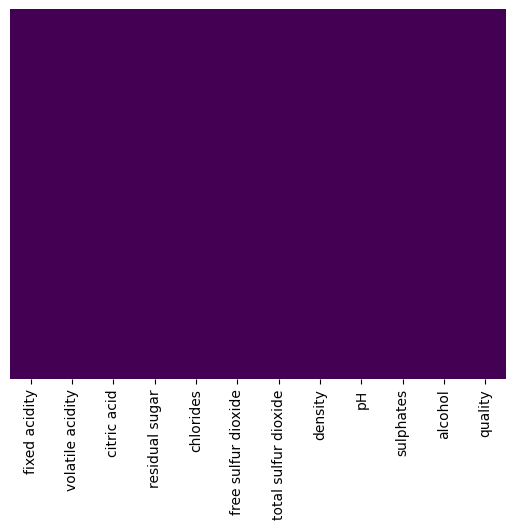

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df.duplicated().sum()

240

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 12 numerical features : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

We have 0 categorical features : []


In [16]:
for column in list(df.select_dtypes(include='object')):
  print(column, ': ', df[column].unique())
  print('\n','*'*110)

In [17]:
for column in list(df.select_dtypes(include='int')):
  print(column, ': ', df[column].unique())
  print('\n','*'*112)

quality :  [5 6 7 4 8 3]

 ****************************************************************************************************************


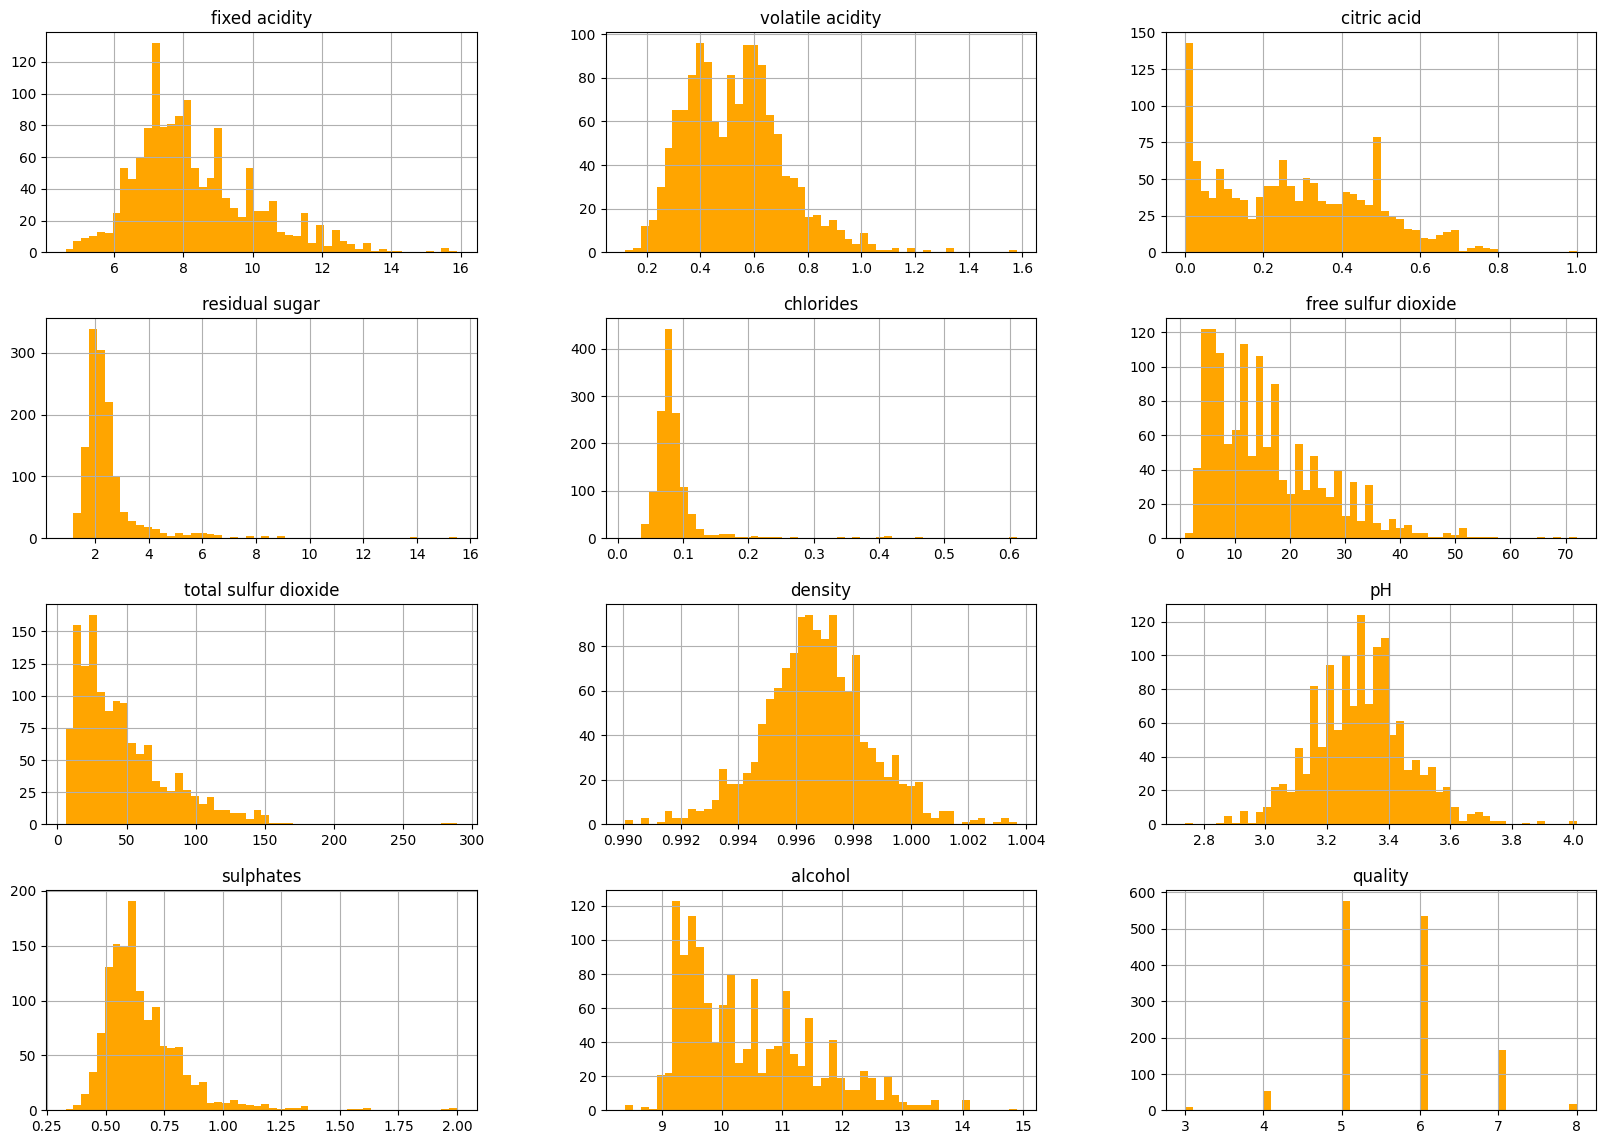

In [21]:
df.hist(bins=50, figsize=(20,14), color = "orange")
plt.show()

In [19]:
for feature in numeric_features:
    status,p_val = normaltest(df[feature])
    print(f'p value[{feature}] :', p_val)
    if p_val.all() > 0.05:
        print('Null hypothesis >> {} data is Normally Distributed.'.format(feature))
    else:
        print('Alternate Hypothesis >> {} data is not Normally distributed.'.format(feature))
    print('*'*100)

p value[fixed acidity] : 2.188332481544536e-39
Null hypothesis >> fixed acidity data is Normally Distributed.
****************************************************************************************************
p value[volatile acidity] : 2.9580584735150456e-30
Null hypothesis >> volatile acidity data is Normally Distributed.
****************************************************************************************************
p value[citric acid] : 1.5711339833419117e-28
Null hypothesis >> citric acid data is Normally Distributed.
****************************************************************************************************
p value[residual sugar] : 1.3499180005694636e-283
Null hypothesis >> residual sugar data is Normally Distributed.
****************************************************************************************************
p value[chlorides] : 0.0
Alternate Hypothesis >> chlorides data is not Normally distributed.
*******************************************************

In [22]:
normally_distributed_features = ['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide','density', 'pH', 'quality']

for feature in normally_distributed_features:
    mean = df[feature].mean()
    std = df[feature].std()
    print('mean({}): '.format(feature), mean)
    print('standard distribution({}): '.format(feature), std)

    threshold = 3
    outliers = []
    for val in df[feature]:
        z_score = (val - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(val)
    print('Detected Outliers of {} are: '.format(feature), outliers) 
    print('*'*100)

mean(fixed acidity):  8.310596026490067
standard distribution(fixed acidity):  1.7369898075324683
Detected Outliers of fixed acidity are:  [15.0, 13.8, 14.0, 13.7, 15.6, 14.3, 15.5, 15.6, 15.9]
****************************************************************************************************
mean(volatile acidity):  0.5294775570272259
standard distribution(volatile acidity):  0.1830313176190719
Detected Outliers of volatile acidity are:  [1.13, 1.33, 1.33, 1.09, 1.24, 1.185, 1.115, 1.58, 1.18]
****************************************************************************************************
mean(residual sugar):  2.5233995584988964
standard distribution(residual sugar):  1.3523137577104225
Detected Outliers of residual sugar are:  [10.7, 7.3, 7.2, 7.0, 11.0, 7.9, 6.7, 6.6, 15.5, 8.3, 7.9, 8.6, 7.5, 6.6, 9.0, 8.8, 8.9, 8.1, 8.3, 8.3, 7.8, 12.9, 13.4, 15.4, 13.8, 6.7, 13.9, 7.8]
****************************************************************************************************
mean(

In [30]:
target = 'quality'

In [31]:
correlation = df.corr()[target]
correlation

fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

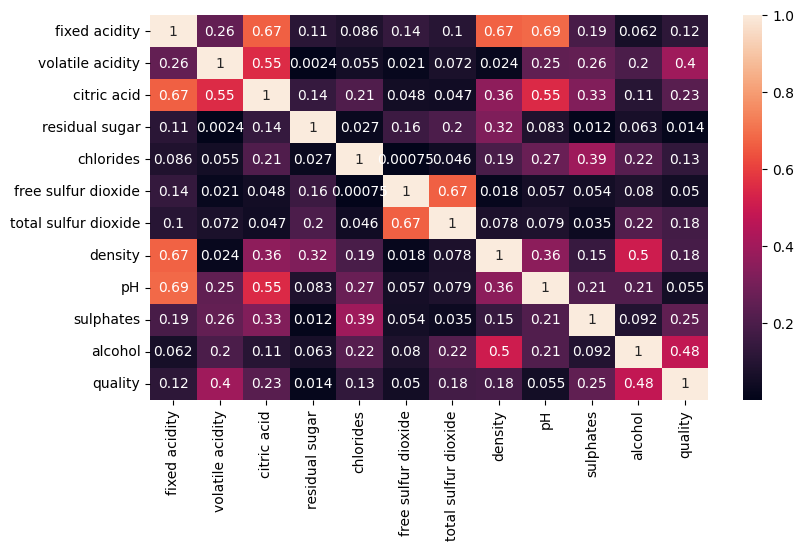

In [36]:
correlation = df.corr().abs()
plt.figure(figsize=(9,5))
sns.heatmap(correlation, annot=True)
plt.show()